In [3]:
#install 
%pip install yfinance pandas numpy matplotlib seaborn scikit-learn

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from datetime import datetime

df = pd.read_csv('stock_details_5_years.csv') #load dataset

--- Logging error ---
Traceback (most recent call last):
  File "/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/pip/_internal/utils/logging.py", line 177, in emit
    self.console.print(renderable, overflow="ignore", crop=False, style=style)
  File "/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/pip/_vendor/rich/console.py", line 1673, in print
    extend(render(renderable, render_options))
  File "/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/pip/_vendor/rich/console.py", line 1305, in render
    for render_output in iter_render:
  File "/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/pip/_internal/utils/logging.py", line 134, in __rich_console__
    for line in lines:
  File "/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/pip/_vendor/rich/segment.py", line 249, in split_lines
    for segment in segments:
  File "/Library/

Data Exploration:

Dataset Shape: (602962, 9)

Dataset Columns: ['Date', 'Open', 'High', 'Low', 'Close', 'Volume', 'Dividends', 'Stock Splits', 'Company']

Data Types:
Date             object
Open            float64
High            float64
Low             float64
Close           float64
Volume            int64
Dividends       float64
Stock Splits    float64
Company          object
dtype: object

First five rows of data:
                        Date        Open        High         Low       Close  \
0  2018-11-29 00:00:00-05:00   43.829761   43.863354   42.639594   43.083508   
1  2018-11-29 00:00:00-05:00  104.769074  105.519257  103.534595  104.636131   
2  2018-11-29 00:00:00-05:00   54.176498   55.007500   54.099998   54.729000   
3  2018-11-29 00:00:00-05:00   83.749496   84.499496   82.616501   83.678497   
4  2018-11-29 00:00:00-05:00   39.692784   40.064904   38.735195   39.037853   

      Volume  Dividends  Stock Splits Company  
0  167080000       0.00           0.0    AAPL  

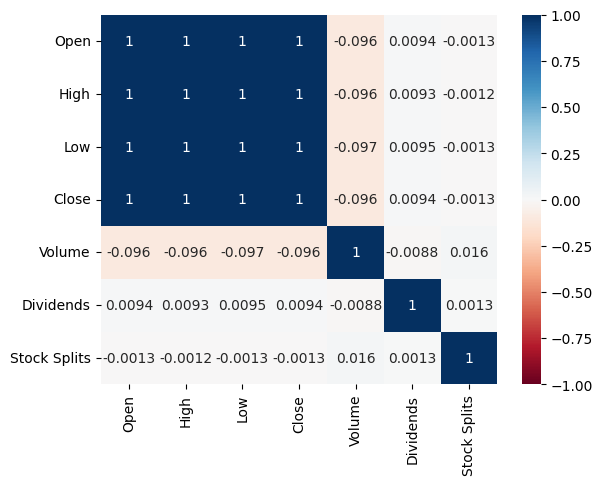

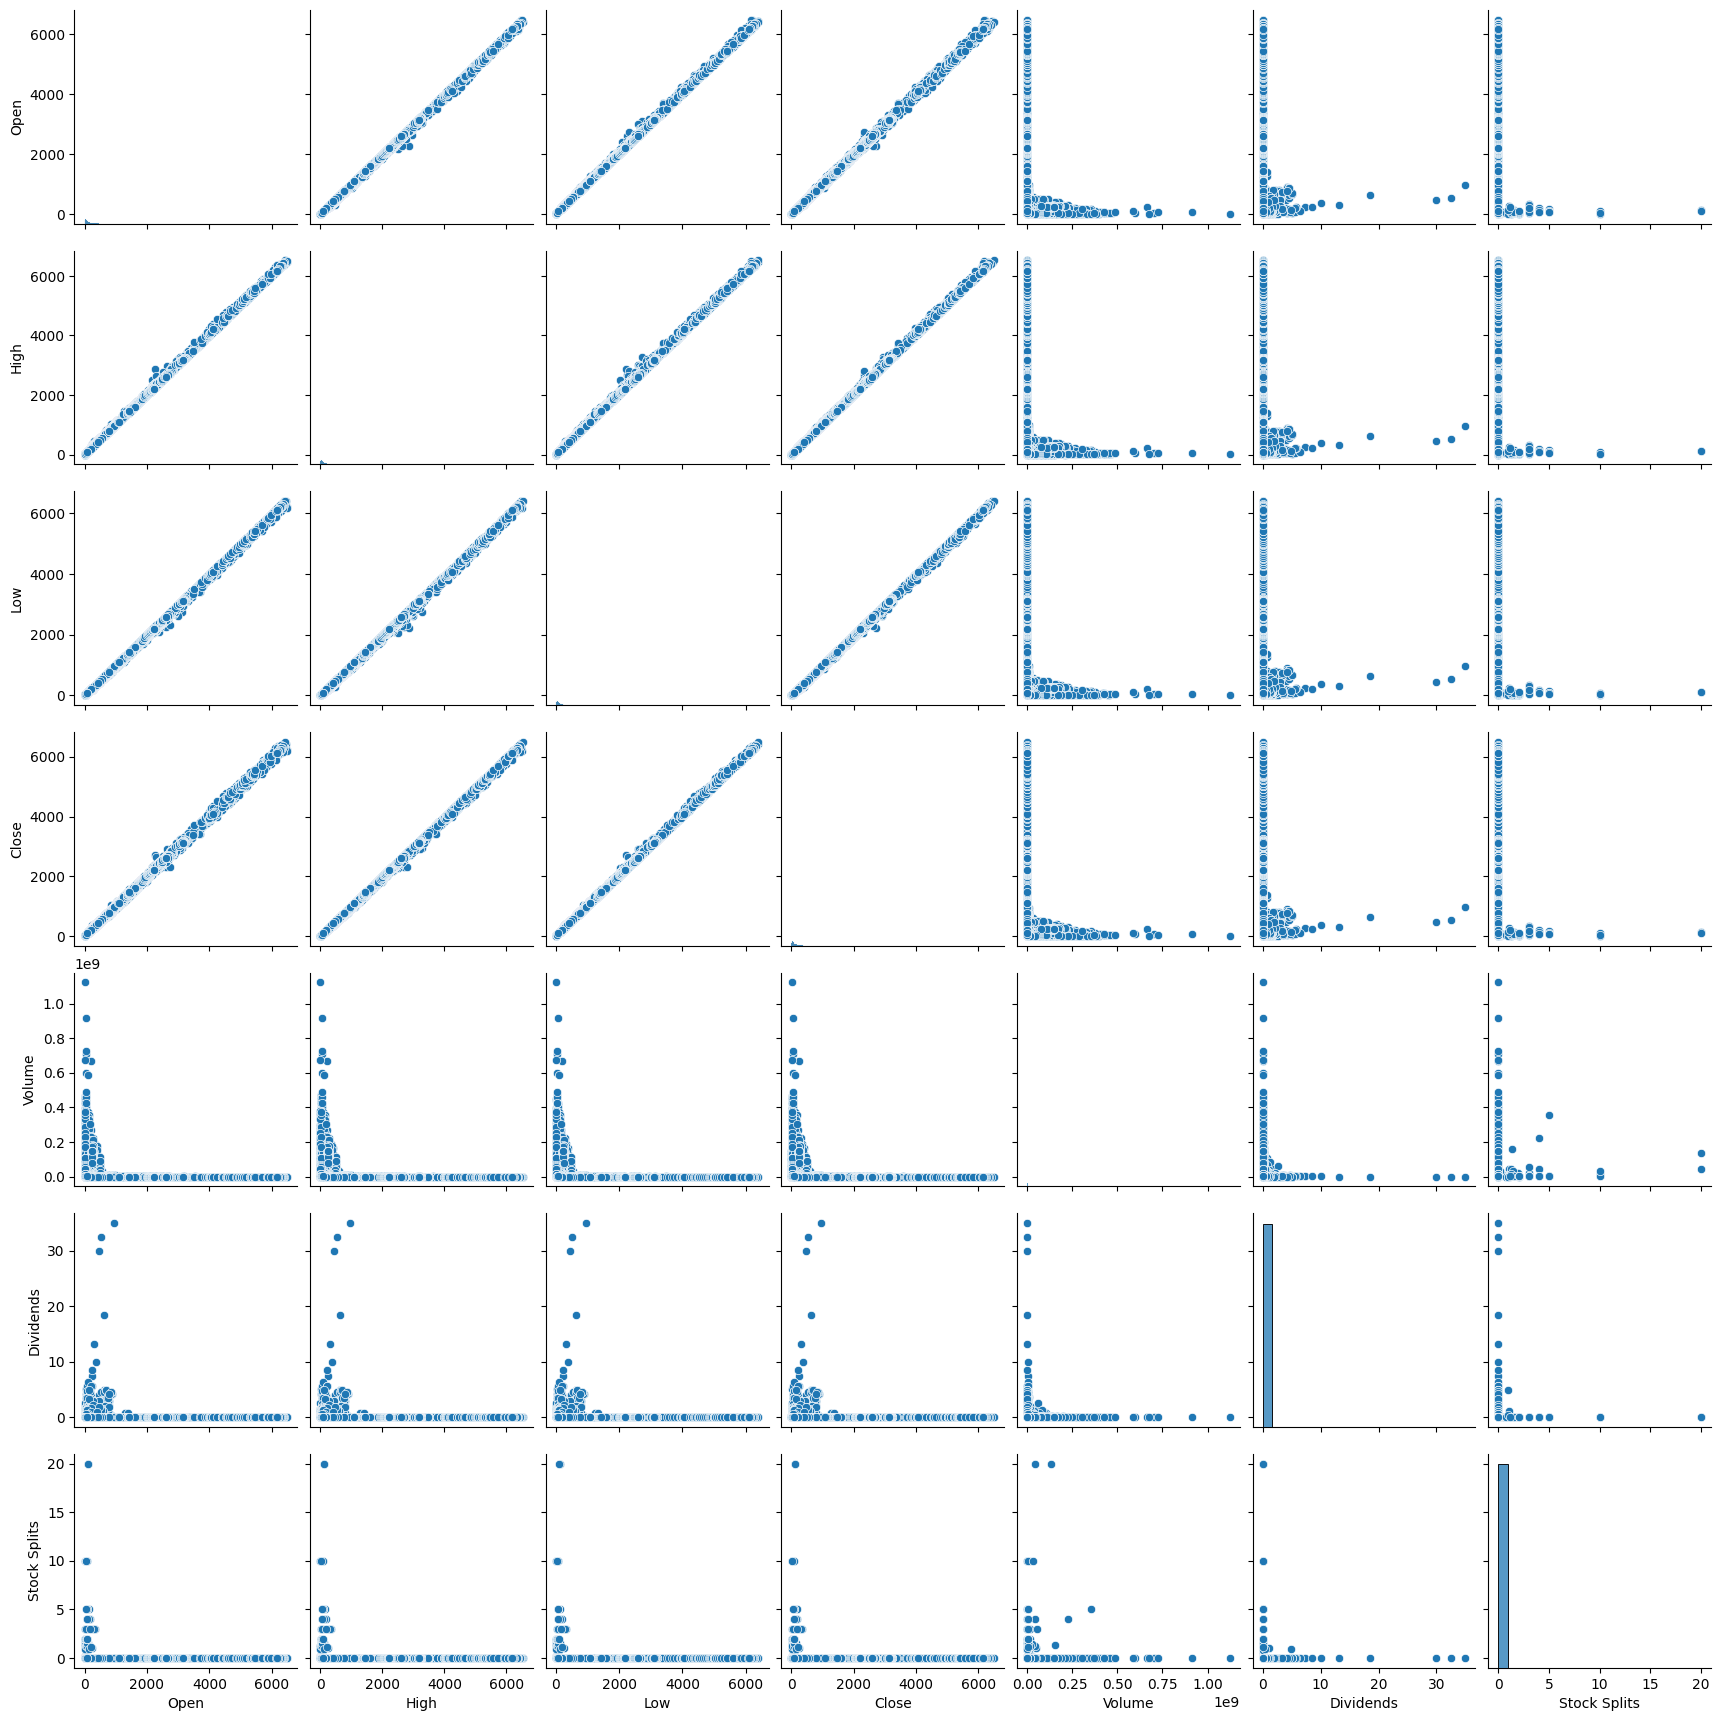

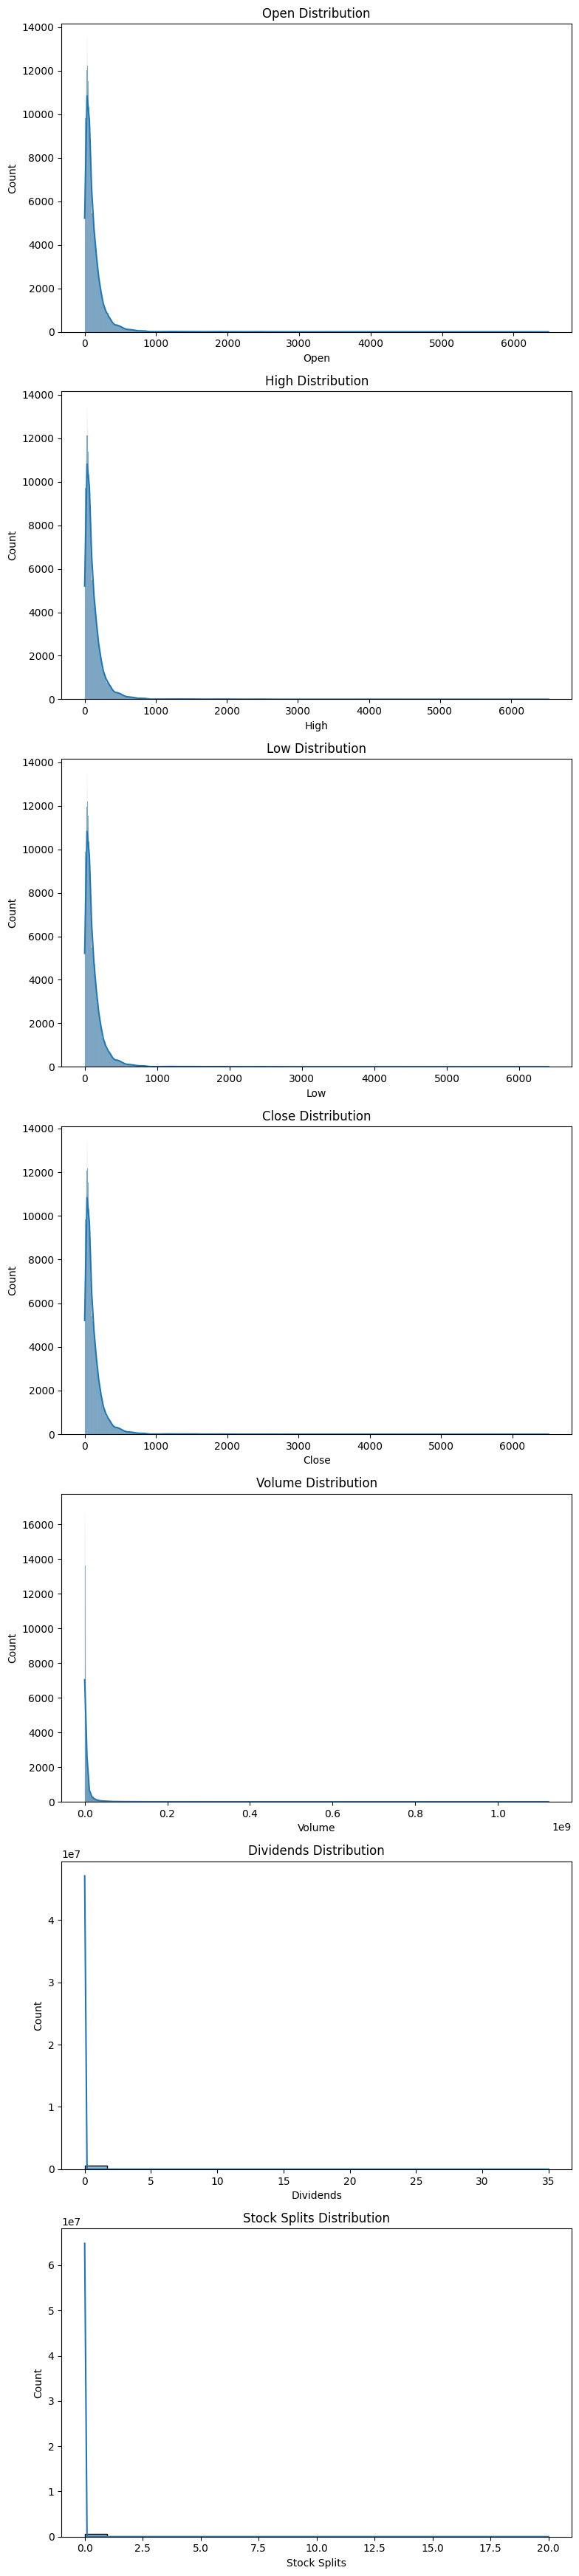

In [4]:
class exploreData:
    def __init__(self, df):
        self.df = df

    """
    Display basic info for data set
        - Shape
        - Column names
        - Data types of each column
        - First 5 rows of the data set
        - Statistical summary of numeric columns 
    """
    def basic_info(self):
        print("Data Exploration:")
        print("\nDataset Shape:", self.df.shape)
        print("\nDataset Columns:", list(self.df.columns))
        print("\nData Types:")
        print(self.df.dtypes)
        print("\nFirst five rows of data:")
        print(self.df.head())
        print("\nSummary:", self.df.describe())

    """
    Display info about companies
        - number of unique company stocks
        - lisat of unique company names or ticker symbols 
    """
    def companies(self):
        print("\nCompanies:")
        
        # Number of unique stocks
        company_amount = self.df['Company'].nunique()
        print(f"\nNumber of unique stocks: {company_amount}")

        #List of all companies
        companies = self.df['Company'].unique()
        print(f"\nStocks Present by Ticker Symbol: {companies}")
        
        
    """
    Check for missing vlaues in each column and display how many there are
    """
    def missing_values(self):
        print("Missing values:")
        missing = self.df.isnull().sum()
        print(f"\nMissing Value Count: {missing}")

    """
    Creates all the plots to explore data distributions and correlations
        - Correlation heatmap
        - Pair plot 
        - Distribution plot 
    """
    def plot(self): 
        #correlation plot
        numeric_cols = self.df.select_dtypes(include=[np.number]).columns
        corr_matrix = self.df[numeric_cols].corr()
        sns.heatmap(corr_matrix, vmin=-1, vmax=1, center=0, annot=True, cmap= 'RdBu')

        #pair plot
        sns.pairplot(self.df)

        #Distribution plots
        plt.figure(figsize=(15, 5*len(numeric_cols)))
        for i, col in enumerate(numeric_cols, 1):
            plt.subplot(len(numeric_cols), 2, i*2-1)
            sns.histplot(self.df[col], kde=True)
            plt.title(f'{col} Distribution')
        plt.tight_layout()
        plt.show()
    
    """
    Runs all the data exploration methods for MS2
        - Basic Info
        - Company Info
        - Missing Values check
        - Data visualizations 
    """
    def analyze(self):
        self.basic_info()
        self.companies()
        self.missing_values()
        self.plot()

data = exploreData(df)
data.analyze()

In [5]:
class preprocessData:
    def __init__(self, df):
        self.df = df


    """
    Drop duplicate rows
    """
    def dropDupes(self):
        self.df = self.df.drop_duplicates()


    """
    Drop Dividends and Stock Splits columns
    """
    def dropCols(self):
        self.df.drop(columns = ["Dividends", "Stock Splits"], inplace = True)


    """
    Convert Date into more usable data
        - Extract Year, Month, Day into new columns for easy access
        - Remove time from date because it is unnecessary
    """
    def convertDate(self):
        # Extract year, month, and day
        self.df["Year"] = df["Date"].str[:4].astype(int)
        self.df["Month"] = df["Date"].str[5:7].astype(int)
        self.df["Day"] = df["Date"].str[8:10].astype(int)

        # Drop the original date column
        self.df.drop("Date", axis=1, inplace = True)

        cols = ["Year", "Month", "Day"] + [col for col in self.df.columns if col not in ["Year", "Month", "Day"]]
        self.df = self.df[cols]
        
        
    """
    Encode the company names
    """
    def encodeComp(self):
        # Initialize the LabelEncoder
        label_encoder = preprocessing.LabelEncoder()

        # Apply label encoding to the column
        self.df["Company"] = label_encoder.fit_transform(self.df["Company"])

    
    """
    Min-max Scale all numerical columns (Open, High, Low, Close, Volume)
    """
    def scaleData(self):
        # Create a scaler for Open and scale column
        openScaler = preprocessing.MinMaxScaler()
        self.df["Open"] = openScaler.fit_transform(self.df[["Open"]])

        # Create a scaler for High and scale column
        highScaler = preprocessing.MinMaxScaler()
        self.df["High"] = highScaler.fit_transform(self.df[["High"]])

        # Create a scaler for Low and scale column
        lowScaler = preprocessing.MinMaxScaler()
        self.df["Low"] = lowScaler.fit_transform(self.df[["Low"]])

        # Create a scaler for Close and scale column
        closeScaler = preprocessing.MinMaxScaler()
        self.df["Close"] = closeScaler.fit_transform(self.df[["Close"]])

        # Create a scaler for Volume and scale column
        volScaler = preprocessing.MinMaxScaler()
        self.df["Volume"] = volScaler.fit_transform(self.df[["Volume"]])

    
    """
    Runs all the preprocessing steps
        - Drop unnecessary columns (Divided, Stock Splits)
        - Drop duplicate rows
        - Convert date for easy extraction and removal of time
        - Encode company names
        - Scale numerical features (Min-Max Scaling)

    """
    def preprocess(self):
        self.dropCols()
        self.dropDupes()
        self.convertDate()
        self.encodeComp()
        self.scaleData()

data = preprocessData(df)
data.preprocess()
print(data.df.head())

   Year  Month  Day      Open      High       Low     Close    Volume  Company
0  2018     11   29  0.006592  0.006561  0.006498  0.006461  0.148780        1
1  2018     11   29  0.015983  0.016012  0.016007  0.015918  0.025043      298
2  2018     11   29  0.008187  0.008269  0.008288  0.008250  0.027608      199
3  2018     11   29  0.012744  0.012790  0.012741  0.012698  0.117777       28
4  2018     11   29  0.005955  0.005979  0.005888  0.005839  0.048902      320


In [6]:
import pandas as pd
import numpy as np


df['Date'] = pd.to_datetime(df['Date'])
df = df.sort_values(by=['Company', 'Date'])

# Step 1: Calculate daily returns
df['Daily_Returns'] = df.groupby('Company')['Close'].pct_change()

# Step 2: Calculate annualized return
annualized_return = df.groupby('Company')['Daily_Returns'].mean() * 252  # 252 trading days

# Step 3: Calculate annualized volatility
annualized_volatility = df.groupby('Company')['Daily_Returns'].std() * np.sqrt(252)

# Step 4: Calculate risk-adjusted return
risk_adjusted_return = annualized_return / annualized_volatility

# Combine results into a DataFrame for clarity
results = pd.DataFrame({
    'Annualized_Return': annualized_return,
    'Annualized_Volatility': annualized_volatility,
    'Risk_Adjusted_Return': risk_adjusted_return
}).reset_index()

# Organized data frame of results
print(results)

ranked_results = results.sort_values(by='Risk_Adjusted_Return', ascending=False).reset_index(drop=True)

# Add a rank column
ranked_results['Rank'] = ranked_results.index + 1

# Output the ranked results
print(ranked_results)

/var/folders/6y/dqgtgx3d04q074fjdm22q03h0000gn/T/ipykernel_60218/2469274878.py:5: FutureWarning: In a future version of pandas, parsing datetimes with mixed time zones will raise an error unless `utc=True`. Please specify `utc=True` to opt in to the new behaviour and silence this warning. To create a `Series` with mixed offsets and `object` dtype, please use `apply` and `datetime.datetime.strptime`
  df['Date'] = pd.to_datetime(df['Date'])


    Company  Annualized_Return  Annualized_Volatility  Risk_Adjusted_Return
0         A           0.166133               0.295840              0.561563
1      AAPL           0.350856               0.326593              1.074293
2      ABBV           0.167552               0.258115              0.649137
3      ABEV           0.022226               0.395858              0.056146
4      ABNB           0.099115               0.535716              0.185015
..      ...                ...                    ...                   ...
486     YUM           0.114588               0.260614              0.439687
487     ZBH           0.062629               0.316652              0.197784
488      ZM           0.211905               0.623125              0.340069
489      ZS           0.523008               0.611179              0.855736
490     ZTS           0.176522               0.285218              0.618901

[491 rows x 4 columns]
    Company  Annualized_Return  Annualized_Volatility  Risk_Adju

In [11]:
df['Daily_Return'] = df['Close'].pct_change()


risk_free_rate = 0.05 / 252  # just a 5% annual risk-free rate divided by 252 trading days for example

# 1. Calculate excess returns above risk-free rate
df['Excess_Return'] = df['Daily_Return'] - risk_free_rate

# 2. Calculate annualized excess return
annualized_excess_return = df['Excess_Return'].mean() * 252

# 3. Calculate annualized volatility
annualized_volatility = df['Daily_Return'].std() * np.sqrt(252)

# 4. Calculate Sharpe ratio
sharpe_ratio = annualized_excess_return / annualized_volatility


print("Annualized Excess Return:", annualized_excess_return)
print("Annualized Volatility:", annualized_volatility)
print("Sharpe Ratio:", sharpe_ratio)


df['Sharpe_Ratio'] = sharpe_ratio


print(df.head())

Annualized Excess Return: 0.3642414366793678
Annualized Volatility: 2.6946011080175793
Sharpe Ratio: 0.1351745293934584
                           Date       Open       High        Low      Close  \
285   2018-11-29 00:00:00-05:00  68.673458  69.589358  68.673458  69.001251   
743   2018-11-30 00:00:00-05:00  69.059076  70.042470  68.779483  69.753235   
1201  2018-12-03 00:00:00-05:00  70.698073  72.105671  70.563099  71.989975   
1659  2018-12-04 00:00:00-05:00  72.018907  72.414195  70.023203  70.293159   
2117  2018-12-06 00:00:00-05:00  68.644532  69.348335  67.391195  69.329056   

       Volume Company  Daily_Returns  Daily_Return  Excess_Return  \
285   2625800       A            NaN           NaN            NaN   
743   2279500       A       0.010898      0.010898       0.010700   
1201  4265200       A       0.032066      0.032066       0.031868   
1659  4263800       A      -0.023570     -0.023570      -0.023769   
2117  3505900       A      -0.013715     -0.013715      -0.0

In [17]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import RobustScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

class StockPredictionModel:
    def __init__(self, df, risk_free_rate=0.05):
        self.df = df
        self.risk_free_rate = risk_free_rate/252
        self.weights = {
            'risk_adjusted_return': 0.4,
            'sharpe_ratio': 0.3,
            'volatility': 0.3
        }
        self.model = None
        self.scaler = RobustScaler()
        
    def calculate_sharpe_ratio(self, returns):
        """Calculate Sharpe ratio for a series of returns"""
        excess_returns = returns - self.risk_free_rate
        if len(excess_returns) > 0:
            ann_excess_return = excess_returns.mean() * 252
            ann_volatility = returns.std() * np.sqrt(252)
            return ann_excess_return / ann_volatility if ann_volatility != 0 else 0
        return 0
        
    def clean_infinite_values(self, df):
        """Replace infinite values with NaN and then fill with appropriate values"""
        numeric_df = df.select_dtypes(include=[np.number])
        numeric_df = numeric_df.replace([np.inf, -np.inf], np.nan)
        
        for column in numeric_df.columns:
            median_value = numeric_df[column].median()
            numeric_df[column] = numeric_df[column].fillna(median_value)
        
        if 'Company' in df.columns:
            numeric_df['Company'] = df['Company']
            
        return numeric_df
    
    def prepare_features(self):
        # Calculate daily returns and Sharpe ratio components
        self.df['Daily_Returns'] = self.df.groupby('Company')['Close'].pct_change()
        self.df['Excess_Returns'] = self.df['Daily_Returns'] - self.risk_free_rate
        
        company_metrics = []
        
        for company in self.df['Company'].unique():
            company_data = self.df[self.df['Company'] == company]
            
            try:
                # Get clean returns data
                daily_returns = company_data['Daily_Returns'].dropna()
                
                # Calculate Sharpe ratio
                sharpe_ratio = self.calculate_sharpe_ratio(daily_returns)
                
                # Traditional calculations
                ann_return = daily_returns.mean() * 252
                volatility = daily_returns.std() * np.sqrt(252)
                risk_adj_return = ann_return / volatility if volatility != 0 else 0
                
                # Volume metrics
                avg_volume = company_data['Volume'].mean()
                volume_trend = company_data['Volume'].pct_change().mean()
                
                # Price trends
                price_trend = company_data['Close'].pct_change().mean()
                future_return = company_data['Close'].pct_change(periods=30).mean()
                
                metrics = {
                    'Company': company,
                    'Risk_Adjusted_Return': risk_adj_return,
                    'Sharpe_Ratio': sharpe_ratio,
                    'Annualized_Return': ann_return,
                    'Volatility': volatility,
                    'Avg_Volume': avg_volume,
                    'Volume_Trend': volume_trend,
                    'Price_Trend': price_trend,
                    'Future_Return': future_return
                }
                
                # Clean infinite values
                metrics = {k: (0 if isinstance(v, (int, float)) and (np.isinf(v) or np.isnan(v)) else v) 
                          for k, v in metrics.items()}
                
                company_metrics.append(metrics)
                
            except Exception as e:
                print(f"Error processing company {company}: {str(e)}")
                continue
            
        features_df = pd.DataFrame(company_metrics)
        return self.clean_infinite_values(features_df)
    
    def apply_weights(self, features_df):
        weighted_features = pd.DataFrame()
        
        try:
            if 'Company' in features_df.columns:
                weighted_features['Company'] = features_df['Company']
            
            # Apply weights including Sharpe ratio
            weighted_features['Weighted_Risk_Adj'] = features_df['Risk_Adjusted_Return'] * self.weights['risk_adjusted_return']
            weighted_features['Weighted_Sharpe'] = features_df['Sharpe_Ratio'] * self.weights['sharpe_ratio']
            weighted_features['Weighted_Volatility'] = features_df['Volatility'] * self.weights['volatility']
            
            numeric_columns = weighted_features.select_dtypes(include=[np.number]).columns
            weighted_features[numeric_columns] = self.clean_infinite_values(weighted_features[numeric_columns])
            
        except Exception as e:
            print(f"Error in apply_weights: {str(e)}")
            raise
            
        return weighted_features
    
    def prepare_target(self, features_df):
        target = features_df['Future_Return']
        target = pd.Series(target).replace([np.inf, -np.inf], np.nan)
        target = target.fillna(target.median())
        return target
    
    def train_model(self):
        try:
            features_df = self.prepare_features()
            weighted_features = self.apply_weights(features_df)
            target = self.prepare_target(features_df)
            
            if 'Company' in weighted_features.columns:
                companies = weighted_features['Company']
                weighted_features = weighted_features.drop('Company', axis=1)
            
            valid_indices = ~(weighted_features.isna().any(axis=1) | target.isna())
            weighted_features = weighted_features[valid_indices]
            target = target[valid_indices]
            
            if len(weighted_features) == 0:
                raise ValueError("No valid data after removing NaN values")
            
            print("\nFeature Statistics:")
            print(weighted_features.describe())
            
            X_train, X_test, y_train, y_test = train_test_split(
                weighted_features, target, test_size=0.2, random_state=42
            )
            
            X_train_scaled = self.scaler.fit_transform(X_train)
            X_test_scaled = self.scaler.transform(X_test)
            
            self.model = RandomForestRegressor(
                n_estimators=100,
                random_state=42,
                max_depth=10,
                min_samples_split=5
            )
            self.model.fit(X_train_scaled, y_train)
            
            y_pred = self.model.predict(X_test_scaled)
            mse = mean_squared_error(y_test, y_pred)
            r2 = r2_score(y_test, y_pred)
            
            print(f"\nModel Performance:")
            print(f"Mean Squared Error: {mse:.4f}")
            print(f"R-squared Score: {r2:.4f}")
            
            feature_importance = pd.DataFrame({
                'Feature': weighted_features.columns,
                'Importance': self.model.feature_importances_
            }).sort_values('Importance', ascending=False)
            
            print("\nFeature Importance:")
            print(feature_importance)
            
            return mse, r2, feature_importance
            
        except Exception as e:
            print(f"Error in train_model: {str(e)}")
            raise

    def calculate_final_scores(self):
        """Calculate normalized final scores for each stock"""
        try:
            features_df = self.prepare_features()
            weighted_features = self.apply_weights(features_df)
            companies = weighted_features['Company'] if 'Company' in weighted_features.columns else None
            if 'Company' in weighted_features.columns:
                weighted_features = weighted_features.drop('Company', axis=1)
                
            feature_weights = {
                'Weighted_Risk_Adj': 0.35,
                'Weighted_Sharpe': 0.35,
                'Weighted_Volatility': -0.10,
                'Avg_Volume': 0.05,
                'Volume_Trend': 0.05,
                'Price_Trend': 0.05,
                'Annualized_Return': 0.05
            }
            
            composite_score = pd.Series(0, index=weighted_features.index)
            for column, weight in feature_weights.items():
                if column in weighted_features.columns:
                    normalized_feature = (weighted_features[column] - weighted_features[column].mean()) / weighted_features[column].std()
                    composite_score += normalized_feature * weight
            
            final_score = 2 * (composite_score - composite_score.min()) / (composite_score.max() - composite_score.min()) - 1
            results = pd.DataFrame({
                'Company': companies,
                'Score': final_score
            })
            
            results = results.sort_values('Score', ascending=False).reset_index(drop=True)
            
            print("\nTop 10 Stocks:")
            print(results.head(10))
            print("\nBottom 10 Stocks:")
            print(results.tail(10))

            results.to_csv('stock_scores.csv', index=False)
            
            return results
            
        except Exception as e:
            print(f"Error in calculate_final_scores: {str(e)}")
            raise

df = pd.read_csv('stock_details_5_years.csv')
model = StockPredictionModel(df)
mse, r2, feature_importance = model.train_model()
final_scores = model.calculate_final_scores()


Feature Statistics:
       Weighted_Risk_Adj  Weighted_Sharpe  Weighted_Volatility
count         491.000000       491.000000           491.000000
mean            0.200266         0.105988             0.111282
std             0.116965         0.089484             0.037901
min            -0.694540        -0.580922             0.035469
25%             0.133954         0.053271             0.085882
50%             0.193666         0.099596             0.102409
75%             0.271240         0.159715             0.125408
max             0.673840         0.466696             0.337982

Model Performance:
Mean Squared Error: 0.0000
R-squared Score: 0.9168

Feature Importance:
               Feature  Importance
1      Weighted_Sharpe    0.770274
2  Weighted_Volatility    0.174082
0    Weighted_Risk_Adj    0.055645

Top 10 Stocks:
  Company     Score
0     CEG  1.000000
1     NVO  0.786483
2     LLY  0.750555
3    SNPS  0.738650
4    CDNS  0.723649
5    CARR  0.723415
6    NVDA  0.713933
7   